<a href="https://colab.research.google.com/github/Born-Decoder/Mnist_demo/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Tue Jun 29 10:46:35 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
!pip install -q git+https://github.com/tensorflow/docs 
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots
import cv2

     |████████████████████████████████| 1.0MB 7.6MB/s 


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Rescale the images from [0,255] to the [0.0,1.0] range.
x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
print("Number of original training examples:", len(x_train))
print("Number of original test examples:", len(x_test))

11493376/11490434 [==============================] - 0s 0us/step
Number of original training examples: 60000
Number of original test examples: 10000


In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
#x_train[0]

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
y_test.shape

(10000,)

In [ ]:
Y_test = to_categorical(y_test)
Y_train = to_categorical(y_train)
print(Y_test.shape)
print(Y_train.shape)

(10000, 10)
(60000, 10)


In [ ]:
#input data is of 28 x 28 pixels
model = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1)),
                                      tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1,1), padding='valid'),
                                      tf.keras.layers.Conv2D(32,3,padding='valid'),
                                      tf.keras.layers.Conv2D(48,3,padding='valid'),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(128,activation='relu'),
                                      tf.keras.layers.Dense(10,activation='softmax')
  ])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=tf.metrics.CategoricalAccuracy(name='accuracy'))
model.summary()
history = model.fit(x_train,Y_train,
                      epochs=3,
                      batch_size=128,
                      validation_data=(x_test,Y_test))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 32)        8096      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 48)        13872     
_________________________________________________________________
flatten (Flatten)            (None, 21168)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2709632   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

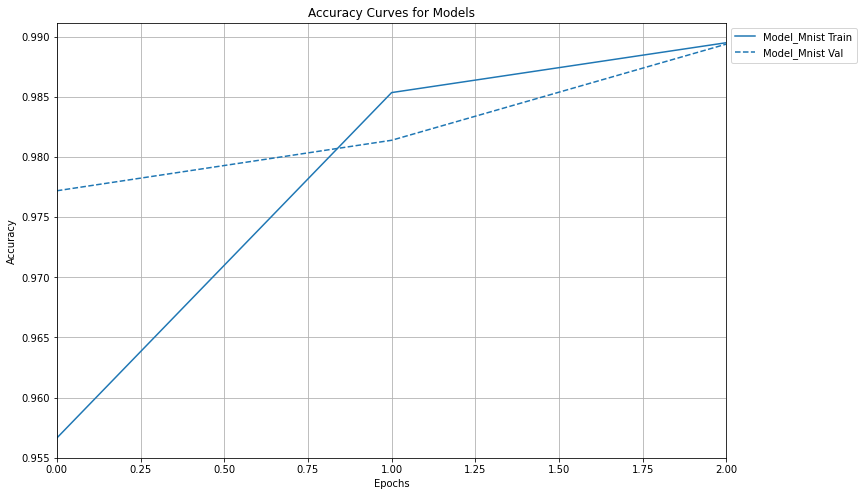

In [ ]:
plt.rcParams['figure.figsize'] = (12, 8)
plotter = tfdocs.plots.HistoryPlotter(metric = 'accuracy')
histories={}
histories['Model_mnist']=history
plotter.plot(histories)
plt.xlabel("Epochs")
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.title("Accuracy Curves for Models")
plt.show()

<class 'numpy.ndarray'>
(273, 272, 3)


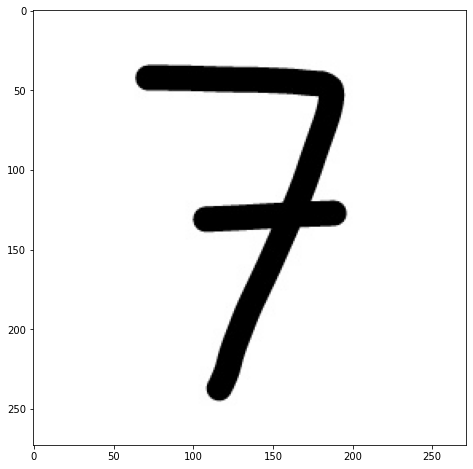

In [ ]:
from PIL import Image
from numpy import asarray
seven = '/content/drive/MyDrive/IMG_20210612_221118.jpg'
three = '/content/drive/MyDrive/IMG_20210612_225502.jpg'
image = Image.open(seven)
data = asarray(image)
print(type(data))
# summarize shape
print(data.shape)
plt.imshow(data)

(28, 28, 3)

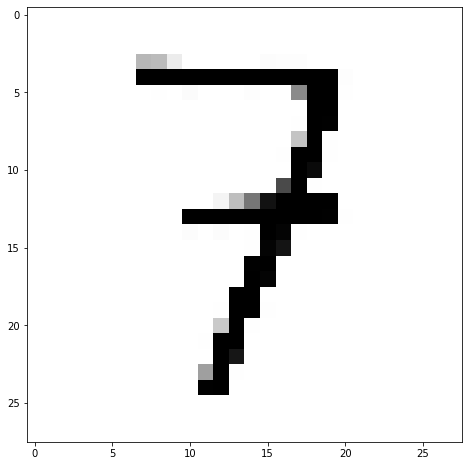

In [ ]:
res_image = cv2.resize(data, (28,28), interpolation=cv2.INTER_CUBIC)
plt.imshow(res_image)
res_image.shape

(28, 28, 1)


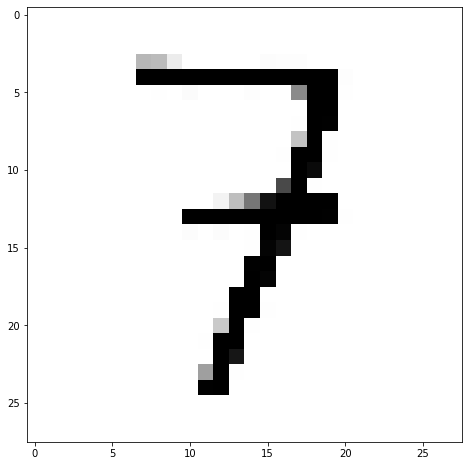

In [ ]:
gray = cv2.cvtColor(res_image, cv2.COLOR_BGR2GRAY)
gray_img = cv2.bitwise_not(gray)
gray_img = np.expand_dims(gray, 2)
print(gray_img.shape)
plt.imshow(gray_img[:,:,0],cmap='gray')

In [ ]:
print(np.argmax(model.predict(x_test[2:3,:,:,:])))

1


1


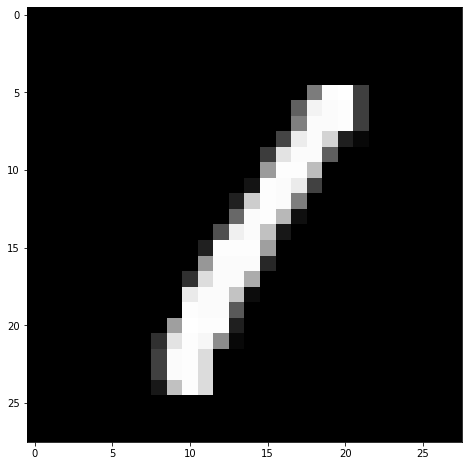

(60000, 28, 28, 1)

In [ ]:
ind = 3
print(y_train[ind])
plt.imshow(x_train[ind,:,:,0],cmap='gray')
plt.show()
x_train.shape

(10000, 28, 28, 1)